In [1]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt

# Table of the counted Supernovae

In [2]:
SNratetb = Table.read('SNrates/SN_withPetroFlux_08042021_rabsmag.txt', format = 'ascii.commented_header')
SNratetb

event,alias,catalog,claimedtype,dec,discoverdate,discoverer,download,ebv,host,hostdec,hostoffsetang,hostoffsetdist,hostra,instruments,lumdist,maxabsmag,maxappmag,maxdate,name,photolink,ra,radiolink,redshift,references,spectralink,velocity,xraylink,z,uflux,uflux_ivar,gflux,gflux_ivar,rflux,rflux_ivar,iflux,iflux_ivar,zflux,zflux_ivar,umag,umag_er,gmag,gmag_er,rmag,rmag_er,imag,imag_er,zmag,zmag_er,Rgal,vflag,rabsmag
str23,str140,str3,str10,float64,str10,str79,str1,float64,str65,str48,float64,float64,str33,str142,float64,float64,float64,str10,str23,str16,float64,int64,str27,str99,str13,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64
ASASSN-13dn,"ASASSN-13dn,CSS140102:125258+322506",sne,II,32.41925,2013/12/15,ASAS-SN,--,0.0129,SDSS J125258.03+322444.3,+32:24:44.3,21.42,10.19,12:52:58.03,--,102.68,-19.333,15.7,2013/12/14,ASASSN-13dn,"1,0",193.2425,--,0.022805,"2013ATel.5665....1S,2016A&A...594A..13P,2013ATel.5667....1M,2011ApJ...737..103S",--,6758.8,--,0.022805,57.79485,0.01211324,289.8477,0.02161896,397.9104,0.04201692,365.166,0.005848842,227.4242,0.0005445918,18.09527,0.1706868,16.34458,0.02547633,16.00054,0.01331149,16.09377,0.03887754,16.6079,0.2045704,68.06171417236328,0,-18.348260828109954
ASASSN-14az,"ASASSN-14az,Gaia14age,MLS140831:234448-020701",sne,IIb,-2.117547222222222,2014/05/20,ASAS-SN,e,0.0274,"PGC 1101367,GALEXASC J234448.27-020653.4",-02:06:53.4,8.94,1.28,23:44:48.27,"C, u, g, r, R, i",29.943,-16.734,15.64,2014/07/22,ASASSN-14az,"25,-36.1,67",356.2,--,0.006731,"2009ApJ...696..870D,2014ATel.6151....1D,2014ATel.6185....1B,2016A&A...594A..13P,2011ApJ...737..103S","1,-53.1",2011.0,--,0.006731,105.3499,0.01638733,276.2211,0.1078128,393.7222,0.04989673,465.4725,0.01249947,393.5354,0.0007667065,17.44341,0.08050719,16.39686,0.01197105,16.01203,0.01234521,15.83027,0.02086336,16.01254,0.09963752,20.152389526367188,9,-15.652880237784276
ASASSN-14bu,ASASSN-14bu,sne,II,25.166633333333333,2014/05/29,ASAS-SN,--,0.0139,SDSS J111840.97+250958.5,+25:09:58.5,1.48,0.784,11:18:40.97,--,114.6,-18.17,17.1,2014/05/28,ASASSN-14bu,"1,0",169.67095833333335,--,0.0254,"2014ATel.6169....1B,2014ATel.6196....1D,2016A&A...594A..13P,2011ApJ...737..103S",--,7520.0,--,0.0254,22.2714,0.1204268,53.14648,0.8450133,74.92245,0.3735397,89.48361,0.1353606,96.55038,0.009277737,19.13059,0.1404691,18.18631,0.02222366,17.81347,0.02371056,17.62064,0.03297852,17.53805,0.1167343,75.767333984375,0,-16.71989451468687
ASASSN-15bd,ASASSN-15bd,sne,IIb,16.610583333333334,2015/01/08,ASAS-SN,--,0.0294,SDSS J155438.39+163637.6,+16:36:37.6,1.08,0.182,15:54:38.39,--,35.38,-16.535,16.2,2015/01/28,ASASSN-15bd,"1,0",238.65970833333333,--,0.007946,"2015ATel.6945....1K,2016A&A...594A..13P,2015ATel.6956....1C,2011ApJ...737..103S",--,2373.0,--,0.007946,82.5851,0.1384537,164.0936,0.8550192,233.7789,0.3454179,257.4846,0.1057257,258.7754,0.01085449,17.70774,0.03533197,16.96227,0.007155575,16.57799,0.007902169,16.47312,0.01296828,16.46768,0.04027074,23.784515380859375,1,-15.481901638954104
ASASSN-15ik,ASASSN-15ik,sne,IIn,3.500738888888889,2015/05/11,ASAS-SN,--,0.0469,SDSS J110204.81+033003.1,+03:30:03.1,1.46,1.05,11:02:04.81,--,158.1,-19.36,16.6,2015/05/10,ASASSN-15ik,"1,0",165.51979166666666,--,0.0348,"2015ATel.7491....1B,2016A&A...594A..13P,2015ATel.7497....1C,2011ApJ...737..103S",--,10300.0,--,0.0348,20.4322,0.3889205,48.35931,1.340777,63.42532,0.6906829,71.69273,0.3366273,67.40577,0.02625342,19.22416,0.08519968,18.2888,0.01938934,17.99434,0.02059772,17.86131,0.02610172,17.92813,0.099387,103.61311340332031,2,-17.191689745580653
ASASSN-15mj,ASASSN-15mj,sne,Ib,33.66119166666667,2015/07/12,ASAS-SN,--,0.0124,"PGC 2036567,2MASX J14021617+3339415,2MASX J14021617+3339",+33:39:41.5,6.76,4.78,14:02:16.17,"UVOT (W2, W1, M2, U, B, V)",156.08,-20.33,15.6,2015/07/15,ASASSN-15mj,"31,-0.405,18.2",210.56516666666667,--,0.034371,"2014Ap&SS.354..

In [25]:
def plot_radec(ra, dec, vflag, sizes=10):
    """Mollweide projection plot adapted to astro coordinates.
    
    Parameters
    ----------
    ra : pandas.Series or list
        List of candidate RA [deg].
    dec : pandas.Series or list
        List of candidate Dec [deg].
    
    Returns
    -------
    fig : matplotlib.Figure
        Figure object to let user apply further plot manipulation.
    """
    # Convert RA, Dec to radians.
    # Rotate the RA so that the plot goes 360->0 left to right.
    _ra = np.radians(180. - ra)
    _dec = np.radians(dec)

    fig, ax = plt.subplots(1,1, figsize=(10,5), subplot_kw={'projection': 'mollweide'})
    
    ax.scatter(_ra[vflag==9], _dec[vflag==9], s=sizes, c='g', alpha=0.5, label='outside')
    ax.scatter(_ra[vflag==2], _dec[vflag==2], s=sizes, c='b', alpha=0.5, label='edge')
    ax.scatter(_ra[vflag==0], _dec[vflag==0], s=sizes*2.5, c='k', alpha=0.5, label='wall')
    ax.scatter(_ra[vflag==1], _dec[vflag==1], s=sizes*2.5, c='r', alpha=0.5, label='void')

    ax.set(xticks=np.radians([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150]),
           xticklabels=['22h', '20h', '18h', '16h', '14h', '12h', '10h', '8h', '6h', '4h', '2h'])
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16, labelcolor='w')
    ax.legend(fontsize=12, loc='lower right')
    ax.grid(ls=':')
    fig.tight_layout()
    
    #return fig;

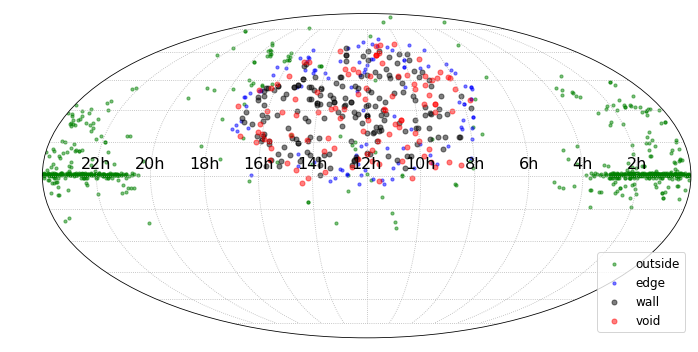

In [26]:
plot_radec(SNratetb['ra'], SNratetb['dec'], SNratetb['vflag'])

# Whole Galaxy file

In [3]:
galSNr_tb = Table.read('SNrates/nsa_v1_0_1_main_vflag_comoving.txt', format = 'ascii.commented_header')
galSNr_tb

ra,dec,redshift,rabsmag,Rgal,vflag
float64,float64,float64,float64,float64,int64
146.6285851269414,-0.7651620976591762,0.0646563172340393,-19.97649574279785,190.83966064453125,2
146.9341288729797,-0.6704053610430766,0.12127048522233963,-21.559162139892578,352.9377746582031,9
146.9634997327016,-0.5447758299302171,0.055980585515499115,-19.10099220275879,165.58349609375,2
146.96352370262414,-0.7593404235056136,0.09708637744188309,-20.089942932128906,284.27178955078125,2
146.85984630722874,-0.8089065016506019,0.12658987939357758,-21.062517166137695,367.9248046875,9
146.5927838471015,-0.7602574022145185,0.06495923548936844,-19.97614288330078,191.7196502685547,2
146.72838067287842,-0.5569743913807053,0.08931196480989456,-19.900196075439453,262.0144348144531,2
147.18677363814004,-0.4938139466493589,0.09031707048416138,-20.94278907775879,264.8970031738281,2
146.95608041489135,-0.34230852875962586,0.13468021154403687,-21.625717163085938,390.63812255859375,9


# All

In [4]:
nSN_void = np.sum(SNratetb['vflag'] == 1)
nSN_void

102

In [5]:
nSN_wall = np.sum(SNratetb['vflag'] == 0)
nSN_wall

188

In [6]:
nGal_void = np.sum(galSNr_tb['vflag'] == 1)
nGal_void

86798

In [7]:
nGal_wall = np.sum(galSNr_tb['vflag'] == 0)
nGal_wall

209619

In [8]:
#ratio between the SN(from own results 1171 obj) in void and galaxies in a void. 
SNGAl_void = (nSN_void) / nGal_void 
SNGAl_void

0.0011751422843844328

In [9]:
#ratio between SN(from own results, 1171 obj) in a wall and galaxies in a wall.
SNGAL_wall = (nSN_wall) / (nGal_wall)
SNGAL_wall

0.000896865265076162

# Dwarfs $M_r > -17$

In [10]:
DwarfSN_tb = SNratetb[SNratetb['rabsmag'] > -17]

In [11]:
nSN_wall_Dwrf = np.sum(DwarfSN_tb['vflag'] == 0)
nSN_wall_Dwrf

18

In [12]:
nSN_void_Dwrf = np.sum(DwarfSN_tb['vflag'] == 1)
nSN_void_Dwrf

20

In [13]:
DwarfSNgal_tb = galSNr_tb[galSNr_tb['rabsmag'] > -17]

In [14]:
ngal_wall_Dwrf = np.sum(DwarfSNgal_tb['vflag'] == 0)
ngal_wall_Dwrf

3631

In [15]:
ngal_void_Dwrf = np.sum(DwarfSNgal_tb['vflag'] == 1)
ngal_void_Dwrf

3432

In [16]:
#ratio of dwarfs(our results) and galaxies ---> <-17 ---->wall
DwSNGal_wall = (nSN_wall_Dwrf) / (ngal_wall_Dwrf)
DwSNGal_wall

0.004957312035251997

In [17]:
#ratio of dwarfs(our results) and galaxies ---> <-17 ---->void
DwSNGal_void = nSN_void_Dwrf / ngal_void_Dwrf
DwSNGal_void

0.005827505827505828

# $-17 > M_r > -18$

In [18]:
SN1718_tb = SNratetb[(SNratetb['rabsmag'] < -17) & (SNratetb['rabsmag'] > -18)]

In [19]:
nSN_void_1718 = np.sum(SN1718_tb['vflag'] == 1)
print(nSN_void_1718)

6


In [20]:
nSN_wall_1718 = np.sum(SN1718_tb['vflag'] == 0)
print(nSN_wall_1718)

12


In [21]:
Gal1718_tb = galSNr_tb[(galSNr_tb['rabsmag'] < -17) & (galSNr_tb['rabsmag'] > -18)]

In [22]:
ngal_void_1718 = np.sum(Gal1718_tb['vflag'] == 1)
ngal_void_1718

4793

In [23]:
ngal_wall_1718 = np.sum(Gal1718_tb['vflag'] == 0)
ngal_wall_1718

9601

In [24]:
SNGal_1718_void = nSN_void_1718 / ngal_void_1718
SNGal_1718_void

0.0012518255789693302

In [25]:
SNGal_1718_wall = nSN_wall_1718 / ngal_wall_1718
SNGal_1718_wall

0.001249869805228622

# $-18 > M_r > -19$ 

In [26]:
SN1819_tb = SNratetb[(SNratetb['rabsmag'] < -18) & (SNratetb['rabsmag'] > -19)]

In [27]:
nSN_void_1819 = np.sum(SN1819_tb['vflag'] == 1)
nSN_void_1819

23

In [28]:
nSN_wall_1819 = np.sum(SN1819_tb['vflag'] == 0)
nSN_wall_1819

28

In [29]:
Gal1819_tb = galSNr_tb[(galSNr_tb['rabsmag'] < -18) & (galSNr_tb['rabsmag'] > -19)]

In [30]:
ngal_void_1819 = np.sum(Gal1819_tb['vflag'] == 1)
ngal_void_1819

12256

In [31]:
ngal_wall_1819 = np.sum(Gal1819_tb['vflag'] == 0)
ngal_wall_1819

24411

In [32]:
SNGal_1819_void = nSN_void_1819 / ngal_void_1819
SNGal_1819_void

0.0018766318537859008

In [33]:
SNGal_1819_wall = nSN_wall_1819 / ngal_wall_1819
SNGal_1819_wall

0.0011470238826758428

# $ -19 > M_r > -20 $

In [34]:
SN1920_tb = SNratetb[(SNratetb['rabsmag'] < -19) & (SNratetb['rabsmag'] > -20)]

In [35]:
nSN_void_1920 = np.sum(SN1920_tb['vflag'] == 1)
nSN_void_1920

21

In [36]:
nSN_wall_1920 = np.sum(SN1920_tb['vflag'] == 0)
nSN_wall_1920

41

In [37]:
Gal1920_tb = galSNr_tb[(galSNr_tb['rabsmag'] < -19) & (galSNr_tb['rabsmag'] > -20)]

In [38]:
ngal_void_1920 = np.sum(Gal1920_tb['vflag'] == 1)
ngal_void_1920

29100

In [39]:
ngal_wall_1920 = np.sum(Gal1920_tb['vflag'] == 0)
ngal_wall_1920

70869

In [40]:
SNGal_1920_void = nSN_void_1920 / ngal_void_1920
SNGal_1920_void

0.0007216494845360825

In [41]:
SNGal_1920_wall = nSN_wall_1920 / ngal_wall_1920
SNGal_1920_wall

0.0005785322214226248

# $ M_r < -20 $

In [42]:
DwarfSN_20 = SNratetb[SNratetb['rabsmag'] < -20]

In [43]:
DwarfSN_Void_20 = np.sum(DwarfSN_20['vflag'] == 1)
DwarfSN_Void_20

32

In [44]:
DwarfSN_Wall_20 = np.sum(DwarfSN_20['vflag'] == 0)
DwarfSN_Wall_20

89

In [45]:
galSN_20 = galSNr_tb[galSNr_tb['rabsmag'] < -20]

In [46]:
gal_void20 = np.sum(galSN_20['vflag'] == 1)
gal_void20

37214

In [47]:
gal_Wall20 = np.sum(galSN_20['vflag'] == 0)
gal_Wall20

101104

In [48]:
galDWSN_20void = DwarfSN_Void_20 / gal_void20
galDWSN_20void

0.0008598914387058634

In [49]:
galDWSN_20wall = DwarfSN_Wall_20 / gal_Wall20
galDWSN_20wall

0.0008802816901408451